WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the units to "imperial"
units = "metric"

# Set the API base URL with units parameter
base_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&"

# Create a list to store city data
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and API key
    city_url = f"{base_url}q={city}&appid={weather_api_key}"

    # Log the record and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Increment the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Send API request and get response
        response = requests.get(city_url)
        response.raise_for_status() # Check for any errors in the response

        city_weather = response.json()

        # latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | laayoune plage
City not found. Skipping...
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | toga village
City not found. Skipping...
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | constantia
Processing Record 20 of Set 1 | kijang
Pr

Processing Record 39 of Set 4 | happy valley-goose bay
Processing Record 40 of Set 4 | bronkhorstspruit
Processing Record 41 of Set 4 | kulhudhuffushi
Processing Record 42 of Set 4 | machico
Processing Record 43 of Set 4 | keflavik
Processing Record 44 of Set 4 | malazgirt
Processing Record 45 of Set 4 | canguaretama
Processing Record 46 of Set 4 | ilave
Processing Record 47 of Set 4 | turuntayevo
Processing Record 48 of Set 4 | inhambane
Processing Record 49 of Set 4 | kirakira
Processing Record 0 of Set 5 | ambovombe
Processing Record 1 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 5 | santa ana
Processing Record 3 of Set 5 | tura
Processing Record 4 of Set 5 | bantay
Processing Record 5 of Set 5 | tanjung selor
City not found. Skipping...
Processing Record 6 of Set 5 | rio branco
Processing Record 7 of Set 5 | ponta delgada
Processing Record 8 of Set 5 | cargados carajos
City not found. Skipping...
Processing Record 9 of Set 5 | puerto san carlos
City not

Processing Record 29 of Set 8 | fuxin
Processing Record 30 of Set 8 | el hadjira
Processing Record 31 of Set 8 | kingston
Processing Record 32 of Set 8 | mananjary
Processing Record 33 of Set 8 | qujing
Processing Record 34 of Set 8 | moroni
Processing Record 35 of Set 8 | kitgum
Processing Record 36 of Set 8 | lutes mountain
City not found. Skipping...
Processing Record 37 of Set 8 | kultali
City not found. Skipping...
Processing Record 38 of Set 8 | zhangzhou
Processing Record 39 of Set 8 | flying fish cove
Processing Record 40 of Set 8 | takeo
Processing Record 41 of Set 8 | castillos
Processing Record 42 of Set 8 | kashgar
Processing Record 43 of Set 8 | debila
Processing Record 44 of Set 8 | nowshahr
Processing Record 45 of Set 8 | lembar
City not found. Skipping...
Processing Record 46 of Set 8 | arkadak
Processing Record 47 of Set 8 | labrador city
Processing Record 48 of Set 8 | pipar
Processing Record 49 of Set 8 | georgetown
Processing Record 0 of Set 9 | dryden
Processing Re

Processing Record 19 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 20 of Set 12 | tres arroyos
Processing Record 21 of Set 12 | dalmatovo
Processing Record 22 of Set 12 | arta
Processing Record 23 of Set 12 | port glaud
City not found. Skipping...
Processing Record 24 of Set 12 | konakovo
Processing Record 25 of Set 12 | queenstown
Processing Record 26 of Set 12 | dauphin
Processing Record 27 of Set 12 | cherdyn'
Processing Record 28 of Set 12 | enniscorthy
Processing Record 29 of Set 12 | bocas del toro
Processing Record 30 of Set 12 | guachochi
City not found. Skipping...
Processing Record 31 of Set 12 | tangalle
Processing Record 32 of Set 12 | petauke
Processing Record 33 of Set 12 | tupiza
Processing Record 34 of Set 12 | nouadhibou
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
import pandas as pd

# Convert the city_data list to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Show the record count
city_data_df.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display city_data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,16.82,81,0,4.86,NA,1682471298
1,nar'yan-mar,67.6713,53.0870,-7.14,87,10,6.03,RU,1682471327
2,waitangi,-43.9535,-176.5597,13.23,76,98,2.24,NZ,1682471429
3,yellowknife,62.4560,-114.3525,4.20,80,100,3.58,CA,1682471260
4,longyearbyen,78.2186,15.6401,-7.09,79,0,1.54,SJ,1682471211
...,...,...,...,...,...,...,...,...,...
551,bocas del toro,9.3333,-82.2500,26.53,75,50,1.43,PA,1682471077
552,tangalle,6.0240,80.7911,25.09,88,96,1.70,LK,1682471619
553,petauke,-14.2426,31.3253,15.30,76,10,2.79,ZM,1682471619
554,tupiza,-21.4500,-65.7167,14.21,19,0,1.71,BO,1682471620


In [6]:
city_data_df.to_csv("output_data/cities.csv", index = False)

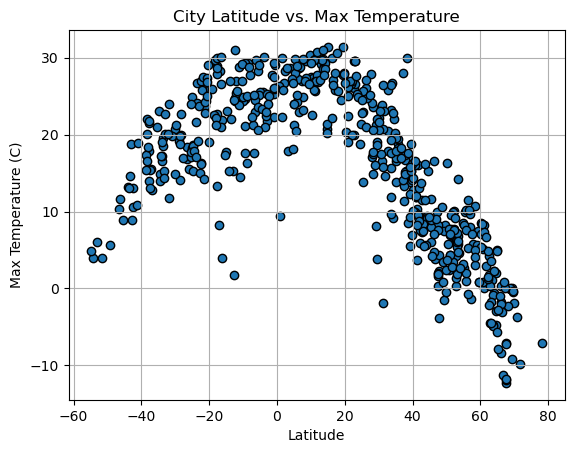

In [7]:
import matplotlib.pyplot as plt

# Extract data for latitude and max temperature from city_data list
latitudes = [city['Lat'] for city in city_data]
max_temps = [city['Max Temp'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, max_temps, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()


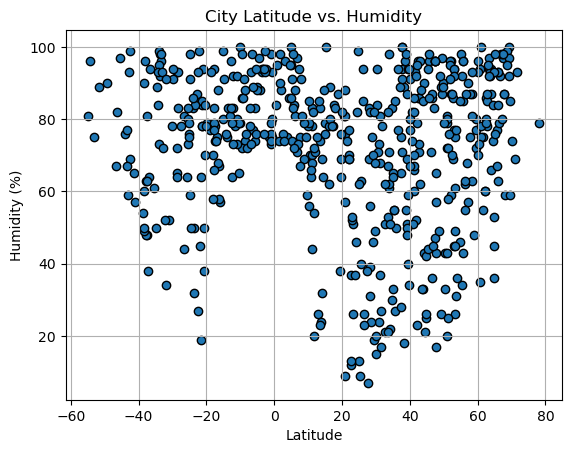

In [8]:
import matplotlib.pyplot as plt

# Extract data for latitude and humidity from city_data list
latitudes = [city['Lat'] for city in city_data]
humidities = [city['Humidity'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, humidities, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()


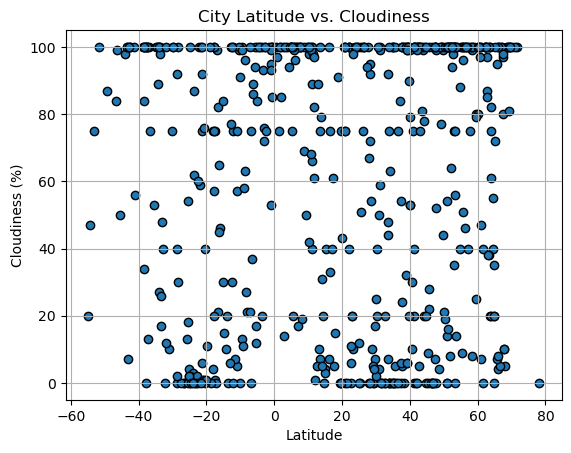

In [9]:
import matplotlib.pyplot as plt

# Extract data for latitude and cloudiness from city_data list
latitudes = [city['Lat'] for city in city_data]
cloudiness = [city['Cloudiness'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, cloudiness, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()


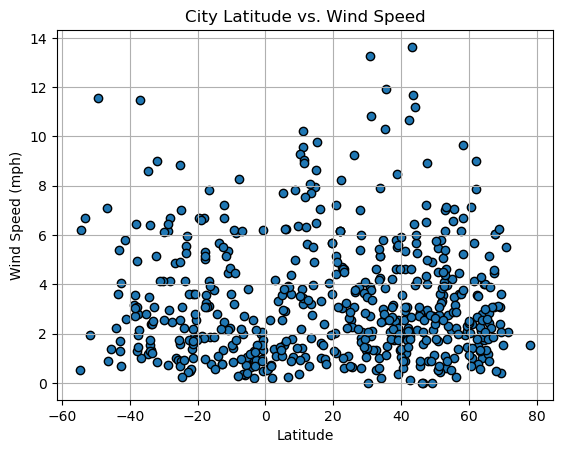

In [10]:
import matplotlib.pyplot as plt

# Extract data for latitude and wind speed from city_data list
latitudes = [city['Lat'] for city in city_data]
wind_speeds = [city['Wind Speed'] for city in city_data]

# Build scatter plot
plt.scatter(latitudes, wind_speeds, marker='o', edgecolors='black')

# Set plot title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, pearsonr

def linear_regression(x, y, xlabel, ylabel, title):
    
    # Calculate linear regression
    try:
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
    except ValueError:
        print("Linear regression failed.")
        return None
    
    # Create regression line
    regression_line = slope * x + intercept
    
    # Create scatter plot
    plt.scatter(x, y)
    
    # Plot regression line
    plt.plot(x, regression_line, color='red')
    
    # Annotate regression equation
    plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', (np.max(x), np.max(y)), fontsize=12, color='red', ha='right')
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Calculate R-squared
    r_squared = pearsonr(x, y)[0] ** 2
    
    # Print R-squared
    print(f"The R-squared value is: {round(r_squared, 2)}")
    
    # Show plot
    plt.show()
    
    # Return the calculated values
    return slope, intercept, r_value, p_value, std_err


In [12]:
# Filter rows with Latitude >= 0 to create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,nar'yan-mar,67.6713,53.0870,-7.14,87,10,6.03,RU,1682471327
3,yellowknife,62.4560,-114.3525,4.20,80,100,3.58,CA,1682471260
4,longyearbyen,78.2186,15.6401,-7.09,79,0,1.54,SJ,1682471211
8,college,64.8569,-147.8028,4.97,45,20,2.06,US,1682471206
10,isafjordur,66.0755,-23.1240,-1.78,63,4,2.42,IS,1682471433


In [13]:
# Filter rows with Latitude <= 0 to create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,16.82,81,0,4.86,NA,1682471298
2,waitangi,-43.9535,-176.5597,13.23,76,98,2.24,NZ,1682471429
5,hithadhoo,-0.6000,73.0833,28.99,75,100,6.20,MV,1682471431
6,san antonio de pale,-1.4014,5.6325,27.79,75,100,1.99,GQ,1682471263
7,adamstown,-25.0660,-130.1015,24.94,76,4,4.92,PN,1682471432


In [14]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def linear_regression(x, y, xlabel, ylabel, title, filename):
    
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create regression line
    regression_line = slope * x + intercept
    
    # Create scatter plot
    plt.scatter(x, y)
    
    plt.plot(x,regression_line,"r-")
    
    # Plot the regression line
    plt.plot(x, regression_line, color='red')
    
    # Note the regression equation in plot
    plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', (np.max(x), np.max(y)), fontsize=12, color='red', ha='right')
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Save plot to file
    plt.savefig(filename)
    
    # Print R-squared value
    print(f"The R-squared value is: {round(r_value, 4)}")
    
    # Show plot
    plt.show()

In [15]:
# Define output filename
north_hem_fig_1 = 'output_data/Northern Hemisphere - Max_Temp_vs_Latitude_linear_regression_northern_hemi.png'

# The linear regression model for Max Temp vs Latitude in the Northern Hemisphere shows a negative slope.

As the latitude increases (moving towards the North Pole), the Max Temperature generally decreases. This suggests a negative correlation between latitude and Max Temperature in the Northern Hemisphere, which is expected as higher latitudes tend to be colder.

The R-squared value is: -0.8982


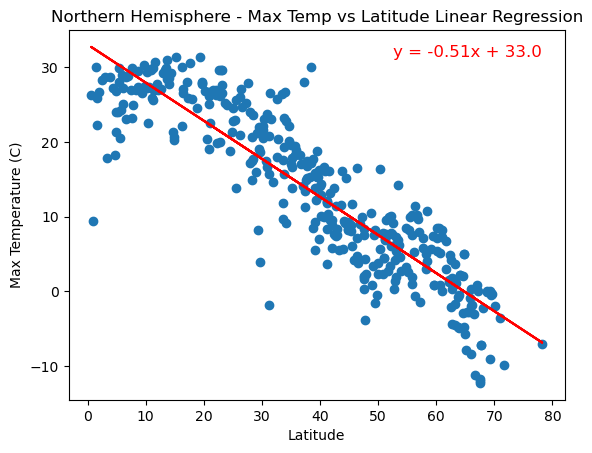

In [16]:
# Extract x and y values from the Northern Hemisphere DataFrame
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Call linear_regression() with the desired filename
linear_regression(x, y, 'Latitude', 'Max Temperature (C)', 'Northern Hemisphere - Max Temp vs Latitude Linear Regression', north_hem_fig_1)


# The linear regression model for Max Temperature vs Latitude in the Southern Hemisphere shows a positive slope

As the latitude decreases (moving towards the South Pole), the Max Temperature generally increases. This suggests a positive correlation between latitude and Max Temperature in the Southern Hemisphere, which is expected as lower latitudes tend to be hotter (seasons are inversed between North and South Pole)

In [17]:
#Define output filename
south_hem_fig_1 = 'output_data/Southern Hemisphere Max_Temp_vs_Latitude_linear_regression_southern_hemi.png'

The R-squared value is: 0.6571


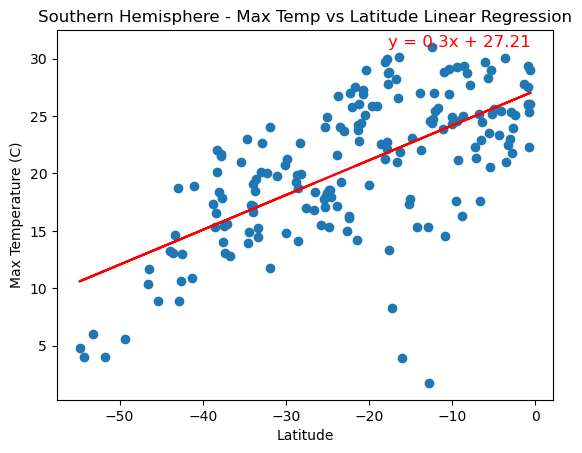

In [18]:
# Extract x and y values from the Southern Hemisphere DataFrame
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Create linear regression plot and save to file
linear_regression(x, y, 'Latitude', 'Max Temperature (C)', 'Southern Hemisphere - Max Temp vs Latitude Linear Regression', south_hem_fig_1)


# The linear regression model for Humidity vs Latitude in the Northern Hemisphere does not show a clear relationship

The slope is almost flat. It has a slight positive correlation compared to the southern hemisphere, indicating that it might be slightly more humid in the northern hemisphere.

In [19]:
# Define output filename
north_hem_fig_2 = 'output_data/Northern Hemisphere - Humidity(%) vs Latitude Linear Regression_north_hem_fig_humidity.png'

The R-squared value is: 0.1149


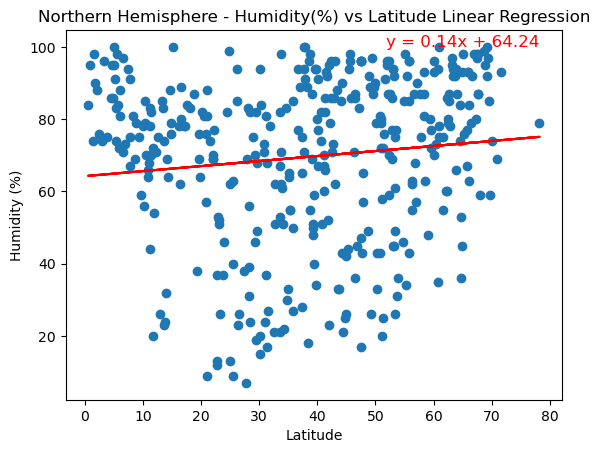

In [20]:
# Extract x and y values from the Northern Hemisphere DataFrame
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# Call linear_regression() with the desired filename
linear_regression(x, y, 'Latitude', 'Humidity (%)', 'Northern Hemisphere - Humidity(%) vs Latitude Linear Regression',north_hem_fig_2)


# The linear regression model for Humidity vs Latitude in the Southern Hemisphere does not show a clear relationship

The slope is almost flat. There seems to be no significant correlation between latitude and humidity in the Southern Hemisphere.

In [21]:
# Define output filename
south_hem_fig_2 = 'output_data/Southern Hemisphere - Humidity(%) vs Latitude Linear Regression_south_hem_fig_humidity.png'

The R-squared value is: 0.1931


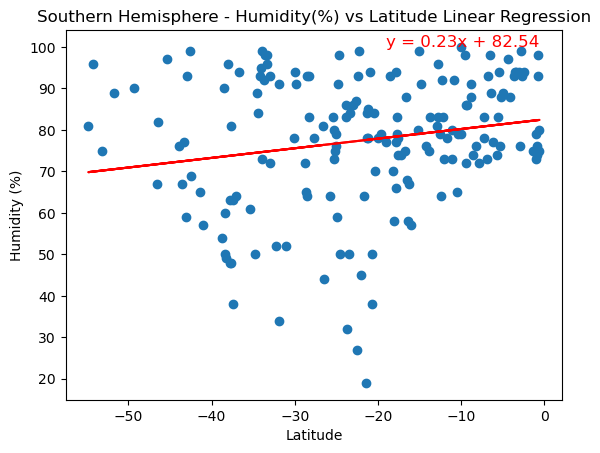

In [22]:
# Extract x and y values from the Southern Hemisphere DataFrame
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Call linear_regression() with the desired filename
linear_regression(x, y, 'Latitude', 'Humidity (%)', 'Southern Hemisphere - Humidity(%) vs Latitude Linear Regression',south_hem_fig_2)


# The linear regression model for Cloudiness vs Latitude in the Northern Hemisphere does not show a clear relationship

There seems to be no significant correlation between latitude and humidity in the Northern Hemisphere. The data points are scattered and do not follow a clear pattern.

In [23]:
# Define output filename
north_hem_fig_3 = 'output_data/Northern Hemisphere - Cloudiness vs Latitude Linear Regression_north_hem_fig_cloudiness.png'

The R-squared value is: 0.0432


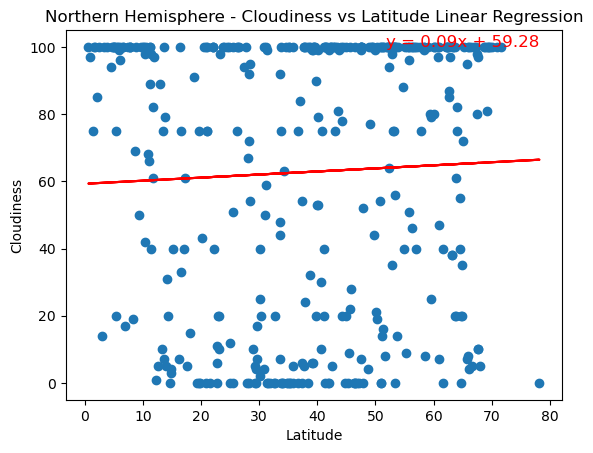

In [24]:
# Extract x and y values from the Northern Hemisphere DataFrame
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# Call linear_regression() with the desired filename
linear_regression(x, y, 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness vs Latitude Linear Regression', north_hem_fig_3)


# The linear regression model for Cloudiness vs Latitude in the Southern Hemisphere does not show a clear relationship

Just like the Northern Hemisphere cloudiness appears to be unrelated to latitude, there seems to be no significant correlation between latitude and humidity in the Southern Hemisphere as well. The data points are scattered and do not follow a clear pattern.

In [25]:
# Define output filename
south_hem_fig_3 = 'output_data/Southern Hemisphere - Cloudiness vs Latitude Linear Regression_south_hem_fig_cloudiness.png'

The R-squared value is: -0.0169


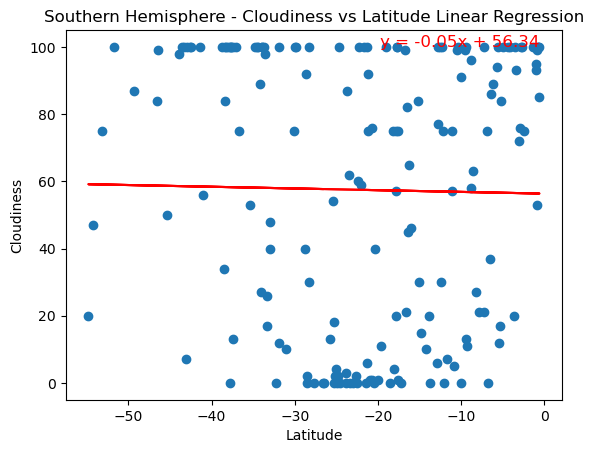

In [26]:
# Extract x and y values from the Southern Hemisphere DataFrame
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

# Call linear_regression() with the desired filename
linear_regression(x, y, 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness vs Latitude Linear Regression', south_hem_fig_3)

# The linear regression model for Wind Speed vs Latitude in the Northern Hemisphere does not show a clear relationship

Just like Cloudiness in both hemispheres, the linear regression model for Wind Speed is almost flat. Wind speed appears to be unrelated to latitude in the Northern Hemisphere.

In [27]:
# Define output filename
north_hem_fig_4 = 'output_data/Northern Hemisphere - Wind Speed vs Latitude Linear Regression_north_hem_fig_windspeed.png'

The R-squared value is: -0.0871


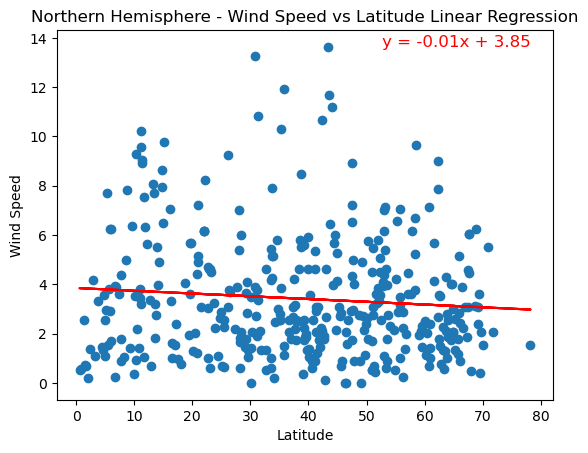

In [28]:
# Extract x and y values from the Northern Hemisphere DataFrame
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# Call linear_regression() with the desired filename
linear_regression(x, y, 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed vs Latitude Linear Regression', north_hem_fig_4)


# # The linear regression model for Wind Speed vs Latitude in the Southern Hemisphere does not show a clear relationship 

Just like Cloudiness in both hemispheres, the linear regression model for Wind Speed is almost flat. Wind speed appears to be unrelated to latitude in the soutthern hemisphere, like in the north hemisphere.

In [29]:
# Define output filename
south_hem_fig_4 = 'output_data/Southern Hemisphere - Wind Speed vs Latitude Linear Regression_south_hem_fig_windspeed.png'

The R-squared value is: -0.2212


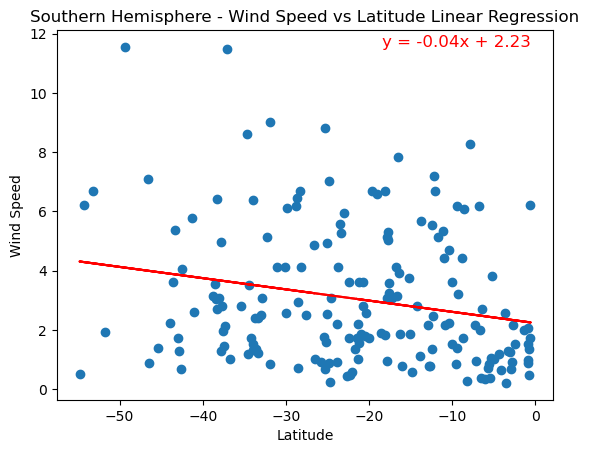

In [30]:
# Extract x and y values from the Southern Hemisphere DataFrame
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# Call linear_regression() with the desired filename
linear_regression(x, y, 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed vs Latitude Linear Regression', south_hem_fig_4)